In [210]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/co2 --filename=out.log --output=../data/co2-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/co2 --filename=out.log --output=../data/co2-k-sos-mp2.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/co2 --filename=out.log --output=../data/co2-ref-kpts.json

In [211]:
import os, sys, json
import pandas as pd

def load_data(f):
    # Load the JSON data as a dictionary first
    with open(f, 'r') as file:
        data = json.load(file)
    
    # Convert the nested dictionary to a list of records
    records = []
    for path, params in data.items():
        # Add the path as a field and merge with params
        record = {'path': path, **params}
        records.append(record)
    
    # Create DataFrame from records
    return pd.DataFrame(records)

method = 'fftisdf-140-14'

d = load_data("../data/co2-ref-kpts.json")
data_co2_ref_kpts = d[d['method'] == method]

d = load_data('../data/co2-klno.json')
data_co2_klno = d[d['method'] == method]

d = load_data('../data/co2-k-sos-mp2.json')
data_co2_k_sos_mp2 = d[d['method'] == method]

In [212]:
# plot all the results
nkpt = data_co2_klno['nkpt'].unique()
nkpt.sort()
nkpt = nkpt[:-2]

for nk in nkpt:
    colors = ['r', 'g', 'b']
    label = ['e_corr_klno_corr_os', 'e_corr_klno_corr_mp2', 'e_corr_klno_corr_ccsd', 'e_corr_klno_corr_ccsd_t']
    cols = data_co2_klno[data_co2_klno['nkpt'] == nk][label]
    x0 = data_co2_k_sos_mp2[data_co2_k_sos_mp2['nkpt'] == nk]['ene_os_lt30'].item()
    x0 = x0 * 1.3

    # print(f"nkpt: {nk}")
    cols = cols[cols != 0]
    # delete NaN
    cols = cols.dropna()
    # sort by e_corr_klno_corr_os
    cols = cols.sort_values('e_corr_klno_corr_os')


    import matplotlib.pyplot as plt
    # fig, ax = plt.subplots()
    # ax.text(0.1, 0.9, r"$N_{\mathrm{{kpt}}} = {%d}$" % nk, transform=ax.transAxes)
    fig, ax = None, None

    ene_krhf = data_co2_klno[data_co2_klno['nkpt'] == nk]['ene_krhf'].values[0]
    out = "nk = %4d, ene_krhf = %12.8f, ene_sos_mp2 = %12.8f" % (nk, ene_krhf, ene_krhf + x0 * 1.3)
    for il, l in enumerate(label[1:]):
        x = cols['e_corr_klno_corr_os']
        y = cols[l]
        # delete repeated values
        x = x.drop_duplicates()
        y = y.drop_duplicates()
        x = x * 1.3

        import numpy, scipy
        from scipy.optimize import curve_fit

        if il == 1:
            r = numpy.polyfit(x[:2], y[:2], 1)
        else:
            r = numpy.polyfit(x[:3], y[:3], 1)
        p = numpy.poly1d(r)
        y0 = p(x0)

        # ax.scatter(x, y, c=colors[il], label=l, s=10, alpha=0.5)
        # xmin = min(x.min(), x0)
        # xmax = max(x.max(), x0)
        # x = numpy.linspace(xmin - 0.1, xmax + 0.1, 100)
        # y = p(x)
        # ax.plot(x, y, color=colors[il], linestyle='--', marker='')
        # ax.scatter([x0], [y0], c=colors[il], marker='x')
        # ax.legend()

        # if il == 0:
        #     ax.set_xlim(xmin - 0.05, xmin + 0.05)
        #     ax.set_ylim(y0 - 0.05, y0 + 0.05)

        name = "ene_" + l.split('e_corr_klno_corr_')[-1]
        out += f", {name} = {y0 + ene_krhf:12.8f}"

    print(out)



nk =    2, ene_krhf = -148.14659542, ene_sos_mp2 = -150.43409942, ene_mp2 = -150.02064848, ene_ccsd = -150.03214476, ene_ccsd_t = -150.10503245
nk =    4, ene_krhf = -148.10062138, ene_sos_mp2 = -150.40095018, ene_mp2 = -149.98631906, ene_ccsd = -149.99437186, ene_ccsd_t = -150.06881062
nk =    8, ene_krhf = -148.07783580, ene_sos_mp2 = -150.38543131, ene_mp2 = -149.97023529, ene_ccsd = -149.97609909, ene_ccsd_t = -150.05206136
nk =   12, ene_krhf = -148.07049376, ene_sos_mp2 = -150.38013005, ene_mp2 = -149.96476131, ene_ccsd = -149.96989609, ene_ccsd_t = -150.04613820
nk =   18, ene_krhf = -148.06442375, ene_sos_mp2 = -150.37536551, ene_mp2 = -149.95988354, ene_ccsd = -149.96436682, ene_ccsd_t = -150.04080811
nk =   27, ene_krhf = -148.06113188, ene_sos_mp2 = -150.37300578, ene_mp2 = -149.95744857, ene_ccsd = -149.96159043, ene_ccsd_t = -150.03815830
nk =   36, ene_krhf = -148.05941384, ene_sos_mp2 = -150.37173011, ene_mp2 = -149.95613443, ene_ccsd = -149.96009661, ene_ccsd_t = -150.0

In [213]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{color}\usepackage{colortbl}"

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

from matplotlib.colors import TABLEAU_COLORS
colors = list(TABLEAU_COLORS)

markersize = 4
s = (markersize / 2) ** 2 * 3.14

style = {
    "hf": {
        "color": colors[0],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_k_sos_mp2": {
        "color": colors[1],
        "marker": "s",
        "linestyle": "--",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_klno_corr_mp2": {
        "color": colors[1],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_klno_corr_ccsd": {
        "color": colors[3],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_klno_corr_ccsd_t": {
        "color": colors[4],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
}


24   -1.757900
32   -1.757104
22   -1.755939
27   -1.754401
33   -1.750794
23   -1.742878
25   -1.737808
26   -1.699616
30   -1.440417
29   -0.711709
Name: e_corr_klno_corr_os, dtype: float64
24   -1.867961
32   -1.866906
22   -1.865229
27   -1.863169
33   -1.858336
23   -1.847525
25   -1.841174
26   -1.795452
30   -1.464196
29   -0.560739
Name: e_corr_klno_corr_mp2, dtype: float64
24   -1.757900
32   -1.757104
22   -1.755939
27   -1.754401
33   -1.750794
23   -1.742878
25   -1.737808
26   -1.699616
30   -1.440417
29   -0.711709
Name: e_corr_klno_corr_os, dtype: float64
24   -1.873412
32   -1.872282
22   -1.870897
27   -1.869471
33   -1.866246
23   -1.860392
25   -1.854962
26   -1.815616
30   -1.549445
29   -0.723874
Name: e_corr_klno_corr_ccsd, dtype: float64
24   -1.757900
32   -1.757104
22   -1.755939
27   -1.754401
33   -1.750794
23   -1.742878
25   -1.737808
26   -1.699616
30   -1.440417
29   -0.711709
Name: e_corr_klno_corr_os, dtype: float64
24   -1.944115
32   -1.942660
22   -1

/Users/yangjunjie/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


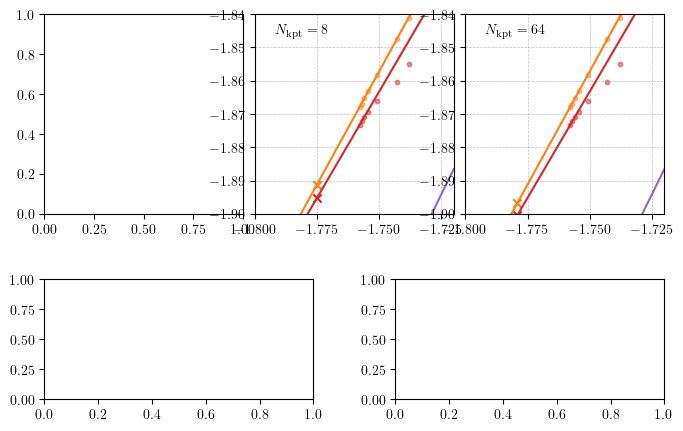

In [ ]:
nkpts = data_co2_klno['nkpt'].unique()
nkpts.sort()

fig = plt.figure(figsize=(8, 5))
fontszie = 12

from matplotlib import gridspec
gs = gridspec.GridSpec(3, 9, height_ratios=[1, 0.1, 0.6])

ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])
ax3 = fig.add_subplot(gs[0, 6:9])
# for ax in [ax1, ax2, ax3]:
#     ax.set_aspect('equal')

ax4 = fig.add_subplot(gs[2, 0:4])
ax5 = fig.add_subplot(gs[2, 5:9])

axs = [ax1, ax2, ax3, ax4, ax5]
axd = {
    1.0: ax1,
    8.0: ax2,
    64.0: ax3,
    "hf-ex": ax4,
    "e-corr-ex": ax5,
}

for ik, nk in enumerate(nkpts):
    if nk not in axd:
        continue

    ax = axd[nk]
    ax.text(0.1, 0.9, r"$N_{\mathrm{{kpt}}} = {%d}$" % nk, transform=ax.transAxes)

    x = data_co2_klno[data_co2_klno['nkpt'] == nk]['e_corr_klno_corr_os']
    x0 = data_co2_k_sos_mp2[data_co2_k_sos_mp2['nkpt'] == nk]["ene_corr_k_sos_lt40_mp2"]

    for il, l in enumerate(label[1:]):
        x = cols['e_corr_klno_corr_os']
        y = cols[l]
        # delete repeated values
        # x = x.drop_duplicates()
        # y = y.drop_duplicates()
        x = x * 1.3
        print(x)
        print(y)

        import numpy, scipy
        from scipy.optimize import curve_fit

        if il == 0:
            r = numpy.polyfit(x[:6], y[:6], 1)
            p = numpy.poly1d(r)
            y0 = p(x0)
        else:
            r = numpy.polyfit(x[:2], y[:2], 1)
            p = numpy.poly1d(r)
            y0 = p(x0)
        
        s = style[l]
        ax.scatter(x, y, c=s['color'], label=l, s=10, alpha=0.5)
        ax.scatter([x0], [y0], c=s['color'], marker='x')
        xmin = -1.80; xmax = -1.72; ymin = -1.90; ymax = -1.84
        xx = numpy.linspace(xmin, xmax, 100)
        yy = p(xx)
        ax.plot(xx, yy, c=s['color'], linestyle=s['linestyle'], alpha=s['alpha'])
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.grid(
            color='grey',
            linestyle='--',
            linewidth=0.5,
            alpha=0.5
        )
        
